<a href="https://colab.research.google.com/github/GlassesNoGlasses/CalCount/blob/neil%2Fgoogle_colab/CalCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import github repo

!git clone https://github.com/GlassesNoGlasses/CalCount.git

Cloning into 'CalCount'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 32.22 KiB | 1.46 MiB/s, done.


# Kaggle Imports:

In [2]:
# install kaggle

!pip install -q kaggle

# Kaggle Verification

### Steps:
- Create a Kaggle Account
- Generate a token; Settings -> Tokens/Authorization
  - Remove any old tokens if present.
- You will then download a kaggle.json file.
- Upload file with credentials here to import data.

In [3]:
# import kaggle datasets

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"phatdumpling","key":"10ca28d00ff9868f3d3b638e3663dc85"}'}

In [4]:
# add kaggle directory to google colab

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
# change file permissions

! chmod 600 ~/.kaggle/kaggle.json

# Importing Datasets from Kaggle

In [6]:
# download data zip file from kaggle

!kaggle datasets download -d kmader/food41

Dataset URL: https://www.kaggle.com/datasets/kmader/food41
License(s): copyright-authors
100% 5.29G/5.30G [01:02<00:00, 90.8MB/s]
100% 5.30G/5.30G [01:02<00:00, 91.4MB/s]


In [7]:
#unzip kaggle data

!unzip food41.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tacos/11237

In [2]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# constants

RANDOM_SEED = 101
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180
DATA_DIR = "/content/images"


In [27]:
# split images into training and testing/validation

train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [28]:
# get class labesl

class_labels = train_ds.class_names
class_labels

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

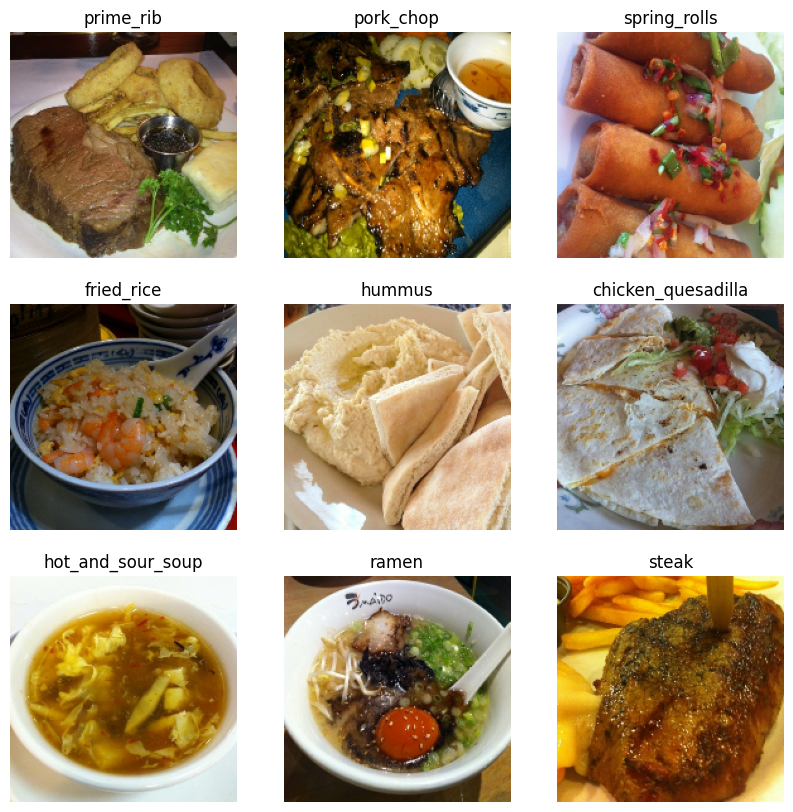

In [10]:
# visualization of data being used

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_labels[labels[i]])
    plt.axis("off")

In [29]:
# reduce dataset size due to colab limitations

import math

NUM_IMAGES = 50
MULTIPLIER = 2
train_to_val = math.ceil(len(train_ds) / len(val_ds))

train_ds = train_ds.take((NUM_IMAGES * train_to_val) * MULTIPLIER)
val_ds = val_ds.take(NUM_IMAGES * MULTIPLIER)

print(len(train_ds))
print(len(val_ds))

400
100


In [30]:
# Cache the dataset and prefetch images

# Dataset.cache(): Caches dataset to save time and reduce bottleneck fetching
# Dataset.prefetch(): Prefetches next image during training/processing

# How many images to fetch for each batch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
# Standardize RGB data

# AKA: Convert RGB [0, 255] to [0, 1] for easier processing
normalization_layer = layers.Rescaling(1./255)

In [32]:
# Creating the model

num_classes = len(class_labels)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
# Compiling the model with loss & optimzier functions

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [35]:
# Train model

epochs=15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
400/400 [==============================] - 43s 38ms/step - loss: 4.6062 - accuracy: 0.0146 - val_loss: 4.5591 - val_accuracy: 0.0234
Epoch 2/15
400/400 [==============================] - 9s 21ms/step - loss: 4.4031 - accuracy: 0.0437 - val_loss: 4.3386 - val_accuracy: 0.0550
Epoch 3/15
400/400 [==============================] - 8s 20ms/step - loss: 4.0289 - accuracy: 0.0941 - val_loss: 4.2696 - val_accuracy: 0.0691
Epoch 4/15
400/400 [==============================] - 9s 21ms/step - loss: 3.3442 - accuracy: 0.2098 - val_loss: 4.6432 - val_accuracy: 0.0603
Epoch 5/15
400/400 [==============================] - 8s 20ms/step - loss: 2.2047 - accuracy: 0.4508 - val_loss: 5.9901 - val_accuracy: 0.0562
Epoch 6/15
400/400 [==============================] - 8s 20ms/step - loss: 1.0625 - accuracy: 0.7217 - val_loss: 7.7893 - val_accuracy: 0.0528
Epoch 7/15
400/400 [==============================] - 9s 21ms/step - loss: 0.4147 - accuracy: 0.8906 - val_loss: 11.2460 - val_accuracy: 0.04

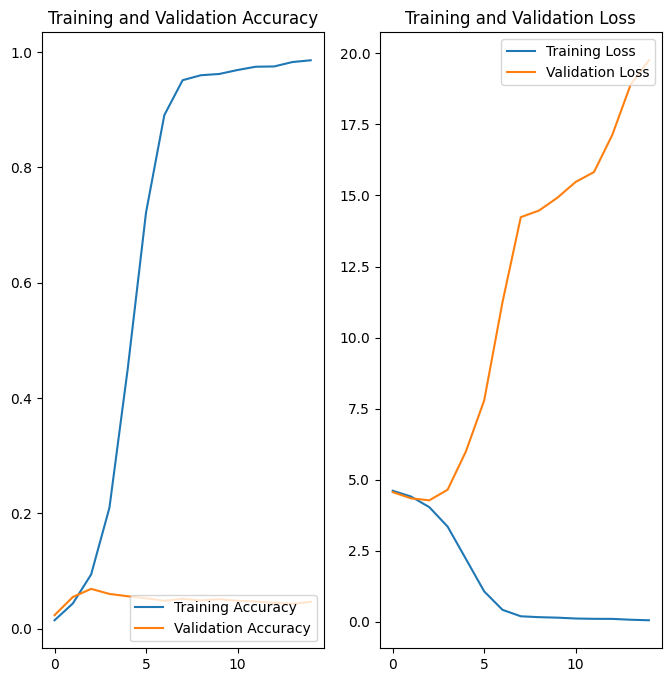

In [36]:
# Visualize Results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluation

The above graphs shows the accuracy and loss between the training dataset and validation dataset.

We see that validation accuracy is low while training accuracy is high; vice-versa for the loss graphs. This implies some form of **overfitting**.

In [38]:
# data augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_HEIGHT,
                                  IMG_WIDTH,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [39]:
# Dropout 20% of nodes from applied layer

DROP_RATE = 0.2

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(DROP_RATE),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [40]:
# Compile model again

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [44]:
# Train again

epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
400/400 [==============================] - 11s 28ms/step - loss: 3.0120 - accuracy: 0.2638 - val_loss: 3.9475 - val_accuracy: 0.1462
Epoch 2/30
400/400 [==============================] - 11s 27ms/step - loss: 2.9474 - accuracy: 0.2771 - val_loss: 4.0084 - val_accuracy: 0.1412
Epoch 3/30
400/400 [==============================] - 11s 27ms/step - loss: 2.9001 - accuracy: 0.2877 - val_loss: 3.9526 - val_accuracy: 0.1559
Epoch 4/30
400/400 [==============================] - 11s 27ms/step - loss: 2.8345 - accuracy: 0.2984 - val_loss: 4.0441 - val_accuracy: 0.1453
Epoch 5/30
400/400 [==============================] - 11s 27ms/step - loss: 2.7848 - accuracy: 0.3095 - val_loss: 4.1280 - val_accuracy: 0.1494
Epoch 6/30
400/400 [==============================] - 11s 28ms/step - loss: 2.7474 - accuracy: 0.3120 - val_loss: 4.0905 - val_accuracy: 0.1425
Epoch 7/30
400/400 [==============================] - 11s 28ms/step - loss: 2.7003 - accuracy: 0.3286 - val_loss: 4.1863 - val_accuracy:

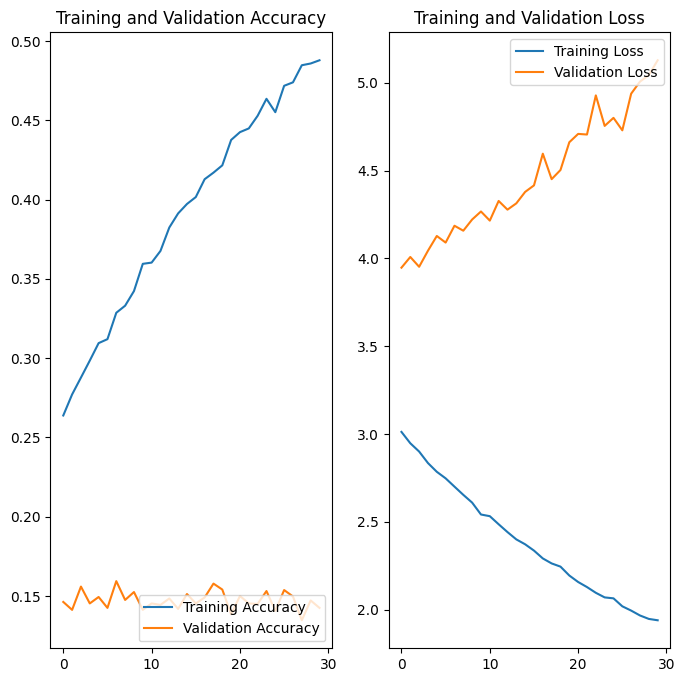

In [45]:
# Visualize Results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluation 2

We observe from above that the validation accuracy has plateaued at around `15%`.

Additionally, the validaiton loss has increased while training loss decreases.

## Notes:

*   Due to RAM limitations on Colab, input size cannot be increased much further without payment.
*   While data augmentation and dropout ratio improved the model accuracy by around `10%`, it is not enough of a major improvement to call the model complete.

